# Natural Language Processing CA 2

Shyam Krishnan k - L00150833 <br>
MSc in Big Data Analytics and Artificial Intelligence <br>
Artificial Intelligence 2 <br>
Assignment - NLP CA 2 <br>

## Q1 Text Classification

In [2]:
# os library is using for accessing operating system dependent functionality
import os
# pandas for data manipulation and analysis
import pandas as pd
# random module using to generate pseudo-random numbers
import random
# numpy is using to manipulate multi-dimensional arrays and matrices. Also support mathematical functions
import numpy as np

In [3]:
df=pd.read_csv('quora_questions.csv') # rading the data into a data frame.
len(df)                               # returns number of rows in the dataframe.

808578

First we will read the all the data in the quora_questions in to a pandas dataframe using Let's read the data (using read_csv).
The data set is consists of 808578.

In [4]:
# to generate 200000 permenent random data sample from the df dataframe including the header.
dataframe = df.sample(n=200001, random_state=123)
len(dataframe)

200001

Pandas sample() is used to generate a sample random row or column from data frame. Here n is a int value which  defines the number of random rows to generate. The "random_state" is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output

In [5]:
dataframe.head() # returns first 5 lines of dataframe

,question
528339,How do I hack a wifi?
161450,Wwe is real fight?
699472,What is written in vedas?
736752,Why don't women propose to men in India?
772144,Which car should I buy for my parents in India?


In [6]:
dataframe.tail() # returns last 5 lines of the dataframe

,question
256607,What is an inclined plane? What are examples o...
300740,How can I prove that a negative number multipl...
531674,How do I learn English step by step?
139362,In what ways are you privileged and in what wa...
702490,Is time travel possible? If yes how


In [7]:
print(dataframe.shape) # return the number of rows and columns in the data frame

(200001, 1)


The data frame is consisits of 200001 rows and 1 column.

In [8]:
print(df.columns) # return the column names in the dataframe

Index(['question'], dtype='object')


In [9]:
# printing a random question in the index position 256607
print(dataframe['question'][256607])

What is an inclined plane? What are examples of this?


## CountVectorizer

CountVectorizer is using to split up the data ie questions into a list of words(a spare matrix with count of each word). ount vectorizer builds a dictionary of features and transforms documents to feature vectors. It is also called one-hot encoding. It is the most basic and simple way of representing text data numerically. Here we will create vectors that have a dimensionality equal to the size of our vocabulary. Each text data featire will be represented using one and when we encounter that word again, we will increase the count, leaving 0s everywhere we did not find the word even once.

In [10]:
# Import count vectorizer from Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

Here fwe will pass the data into a count vectorizer and then transform the question data.
This is performed in two steps.
1. First initiate the model with fine tuned appropriate parameters.
2. Fit the model with the data and transform it into vectors.

In the second setp first we builds vocabulary and counts number of words the questions. Then transform vocabulary of words in the questions to a vector.

In [42]:
# initialise an instance of the count vectorizer
count_vectorizer = CountVectorizer(max_df=0.70, min_df=4, stop_words="english")

we will initialise an instance of the count vectorizer using two variables - max_df and min_df. These parameters are using to define the minimum and maximum number of words we should ignore within our documents. The max_df option accepts a float in range ( 0, 1 ), max_df will ignore terms that have a document frequency strictly higher than the given threshold. The min_df will remove the terms that have a frequency lower than the given threshold in the vocabulary. The min_df can be expressed as float in the range (0, 1) or as an intiger value of minimum occurence.

Here in this example iam using 0.7 as max_df and intiger value 4 as min_df.

The data frame created from quora questions contain 200000 questons asked in the platform. The max_df is set to 0.7 becase i want to remove all major and minor stop words used in the dataset. From the primery analysis of the data set it is clear that all questions in the data set is starting with various Question Words, which is not useful in the context of classification. So to remove all major Question Words and stop words i choose a lower value for max_df.

It is also clear that many of the questions included in the data set is simple one sentence questions. So there is a higher possibility of having unique words that is not much repeated the questions.Here min_df is set to 4 because I want to remove the words that is not present in atleast 4 questions for better topic selection and classification.


In [43]:
# fit and then transforms data into a numerical vector
doc_term_matrix = count_vectorizer.fit_transform(dataframe["question"])

In [44]:
doc_term_matrix

<200001x17114 sparse matrix of type '<class 'numpy.int64'>'
	with 964821 stored elements in Compressed Sparse Row format>

The doc_term_matrix is a sparse matrix of each word in all of the text data. Here the doc_term_matrix contains 200000 rows of questions data and 7155 columns or features corrsponding to rows. Adjusting the max_df and min_df values can increase or decrease the number of terms in the doc_term_matrix.

## Latent Dirichlet Allocation - Model -1

Latent Dirichlet allocation (LDA) is a method of automatically discovering topics from the sentences. A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. LDA represents documents as mixtures of topics that contains set of words with certain probabilities. In Natural Language Processing topic modelling is defined as the process of uncovering hidden structure in a collection of texts. It is a unsupervised mothod using on a collection of text or documents to  group similar words within text together in order to classfy the documents in to topic. LDA spot the semantic relationship between words and group them with the help of associated indicators. To LDA, a document is just a collection of topics where  each topic has some particular probability of generating a certain word.

LDA will represent each questions as a list of probability of topics based on the vocabulary used in it. Each topic will represented as a certain weight which indicates which topic it most likely should be in and we will select topic with heigher weight or probability from the list of weights. Here i will train and fit the LDA model on the dataset by clustering the words based on the correlations between word counts and create categories of words with a certain frequency to determine the specific category based on the common words found within it.

The number of topic is choosed by a  hyperparameter - n_components. For each topic, LDA will pick a distribution of words for that topic. The word ‘topic’ refers to associating a certain word to with a definition. Here in my first model i am initialise an instance of the LDA model by setting n_components = 15 ie we are trying to create a pool of 15 topics with list of correlated words from each text. 

If the optput list of topics contains large number of similar words in each topics we need to reduce the number of topics and rerun the model. If each topic list contains multiple uncorelated words with in each topic, then we need to increase the number of n_components and rerun the model to create a better model.



In [45]:
# importing LDA from Scikit-learn
from sklearn.decomposition import LatentDirichletAllocation

In [46]:
# initialise an instance of the LDA.
lda = LatentDirichletAllocation(n_components=15,random_state=1)

In [47]:
# fit the model with doc_term_matrix
lda.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Here i fit my LDA model on doc_term_matrix with following parameters
n_components=15 and random_state=1. All other parameters are set to default value.

random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random ( default value is None)

learning_decay is a another importent parameter. Its a flot value with default as 0.7.
It is a parameter that control learning rate in the online learning method. The value should be set between (0.5, 1.0] to guarantee asymptotic convergence.

In [48]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda.score(doc_term_matrix))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(doc_term_matrix))

Log Likelihood:  -8122533.54973646
Perplexity:  3546.6198321572715


The performance of a LDA model can be measured using Log Likelihood and Perplexity metrics. A LDA mode with higher Log Likelihood is better than the model with lower Log Likelihood value. For  Perplexity metrix the model with loer value is consider as better one.

In [18]:
# return totla number of vocabularies in count_vectorizer
len(count_vectorizer.get_feature_names())

17114

The count vectorizer contains list of all words that were found within the text documents,w hich we selected using specifying max_df, min_df and removing the stop words with in the documents.

In [19]:
# retun the word in the index position 1200
count_vectorizer.get_feature_names()[1200]

'ap'

In [20]:
# return the probability distribution of words in the count_vectorizer corrsponding to each LDA component.
lda.components_

array([[6.66666869e-02, 6.66667108e-02, 1.06666628e+00, ...,
        6.66666906e-02, 6.66666696e-02, 6.66666667e-02],
       [6.66666955e-02, 1.34321867e+01, 6.66666667e-02, ...,
        6.66668042e-02, 6.66666757e-02, 6.66666821e-02],
       [6.66668819e-02, 2.63734003e+02, 6.66667169e-02, ...,
        6.66666846e-02, 6.66666909e-02, 6.66672558e-02],
       ...,
       [6.66667298e-02, 6.66666982e-02, 6.66666667e-02, ...,
        6.66666667e-02, 6.66667770e-02, 6.66666742e-02],
       [6.66666945e-02, 6.66667018e-02, 6.66666667e-02, ...,
        6.66666667e-02, 6.66666725e-02, 9.06666605e+00],
       [6.66666876e-02, 3.80882729e+01, 6.66667973e-02, ...,
        6.66666667e-02, 5.62441492e-01, 6.66666667e-02]])

Here LDA model is consists of 15 components ie 15 topics and 17114 columns corresponding to  probability of each words in count vectorizer.

In [21]:
lda.components_.shape

(15, 17114)

Below I printed all the top 20 words in each topics with larger probability. Number of words required in each topic is set using the variable top_number = 20. Using for loop at two level and extracted the individual words from count_vectorizer based on the indexnumber from components.

In [22]:
# creating a loop to show the top number of words for each topic
word_list = []
probability_list = []

top_number = 20
count = 0
for probability_number in lda.components_:
    text_message = f"Top words for topic {count} are : "
    print(text_message)    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
    print("\n")  
    count += 1

Top words for topic 0 are : 
['drive']['follow']['snapchat']['remove']['profile']['does']['hack']['problem']['delete']['car']['buy']['don']['know']['phone']['whatsapp']['mind']['people']['account']['facebook']['instagram']

Top words for topic 1 are : 
['faster']['green']['ways']['way']['fast']['gain']['reduce']['review']['fat']['speed']['light']['war']['rid']['youtube']['hair']['movie']['does']['lose']['weight']['world']

Top words for topic 2 are : 
['culture']['important']['market']['india']['know']['rupee']['government']['money']['black']['rs']['old']['going']['year']['1000']['500']['things']['notes']['indian']['day']['new']

Top words for topic 3 are : 
['blood']['jee']['tv']['house']['tell']['power']['college']['date']['high']['different']['series']['game']['control']['2016']['guy']['video']['girls']['like']['girl']['know']

Top words for topic 4 are : 
['life']['startup']['marketing']['differ']['idea']['united']['start']['states']['ways']['study']['sex']['work']['data']['earn'][

15 topic with top 20 words related to each topic is printed above. Topic 0 can be considered as Social Media becuase top 20 words listed in it is manly related to questions related to social media. In the same way analysig the remaining topic we can inference a new topic based on most corelated words in the list. Even though we can observe that there is many words in each topic with no corelation between each other. It is also visible that some topics are highly related to each other based on the listed words. 

These problems are hoping to solve using lowering the components_ value and adjusting max_df and min_df.

In [23]:
# return the probability of each text file belonging to a particular topic
textfile_topics = lda.transform(doc_term_matrix)

In [24]:
textfile_topics.shape

(200001, 15)

Contains list of the 15 topics for all questions, so there are 200001 text files

In [26]:
# I'm using a loop to find the highest topic number that each document belongs to
# then assigning that number to the data frame.
# the topic number will extracted using argmax() function and append with topic_list array.
# The new array will inserted in to the data frame as a new column name Topic number

topic_list = []
# Textfile_topics is a list of arrays containing 
# all index positions of words for each textfile
for popular_index_pos in textfile_topics:
    # Get the max index position in each array
    # and add to the topic_list list
    topic_list.append(popular_index_pos.argmax())

# Add a new column to the dataframe
dataframe["Topic number"] = topic_list
dataframe

,question,Topic number
528339,How do I hack a wifi?,13
161450,Wwe is real fight?,6
699472,What is written in vedas?,6
736752,Why don't women propose to men in India?,3
772144,Which car should I buy for my parents in India?,0
329727,Would there be trans people if society had no ...,5
467123,What is a data scientist?,4
565569,I recently lost my phone. How can I get it back?,13
450954,How do I use anonymous.com?,9
682524,What are the best Bollywood movies of 2016 so ...,11


Examining the above table, it is clear that the topic modelling corresponding to the questions in the data frame is not much accurate.

It is clear that we  need a bettere model with higher accuracy. Majority of topic number assigned to the questions in the data frame is not correct one. 

We can create a new better model by adjusting the max_df and min_df values and choosing best parameter values for components and learning decay.

## GridSearch for the best LDA model

We will use GridSearch to find out best LDA model with optimized parameter values. We can set custem search patterns with range of values for each LDA model parameters. n_components, learning_decay, learning_offset, and max_iter are the major possible search parameters we can use  with our GridSearch. 

The grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. Here for our model we are only using n_components and learning_decay parameters only for our search amd model selection.

In [49]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20], 'learning_decay': [.5, .7]}

# Init the Model
lda_comparison = LatentDirichletAllocation()

# Init Grid Search Class
lda_comparison = GridSearchCV(lda_comparison, param_grid=search_params)

# Do the Grid Search
lda_comparison.fit(doc_term_matrix)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [10, 15, 20], 'learning_decay': [0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
# Best Model which gave highest score 
best_lda_model = lda_comparison.best_estimator_

# Model Parameters is used to store a list of parameter settings dicts for all the parameter candidates
print("Best Model's Params: ", lda_comparison.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_comparison.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(doc_term_matrix))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -2823614.4162483294
Model Perplexity:  3469.486589798985


## LDA Model Performance Scores analysis

After running the grid search,  from the output it is clear that, learning_decay': 0.5, and 'n_components': 10 are the optimized parameter to create a best fit model.

For the suggested model the Log Likelihood Score = -2823614.4162483294 and for the previous model the og Likelihood Score = -8122533.54973646.

The Log Likelihood score of the new suggested model is much higher than previous model.

In the same way the Model Perplexity of the first model with n_components = 15 is 3546.6198321572715 and for our new GridSearch suggested model the Perplexity score is 3469.486589798985 which is smaller than the first model.

Hence we can conclude that constructiong a new model with learning_decay': 0.5, n_components': 10 and random_state= None can deliver better out put.

So we need to construct a new model with n_components': 10 and learning_decay': 0.5 

ie a new model to suggest 10 topic categories.

## New LDA Model with new parameters - Model 2

In [51]:
# initialise an instance of the count vectorizer
count_vectorizer1 = CountVectorizer(max_df=0.90, min_df=2, stop_words="english")
# fit and then transforms data into a numerical vector
doc_term_matrix1 = count_vectorizer1.fit_transform(dataframe["question"])
# print the new doc_term_matrix1
doc_term_matrix1

<200001x27010 sparse matrix of type '<class 'numpy.int64'>'
	with 988045 stored elements in Compressed Sparse Row format>

Here we will create a new doc_term_matrix1 by setting max_df=0.90 and min_df=2

In [52]:
# initialise an instance of the LDA with GridSearch suggested parameters
lda2 = LatentDirichletAllocation(n_components=10,learning_decay=0.5,random_state=None)

In [53]:
# fit the model with new doc_term_matrix1
lda2.fit(doc_term_matrix1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.5,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [54]:
# Log Likelihood Score
print("Log Likelihood: ", lda2.score(doc_term_matrix1))
# Perplexity
print("Perplexity: ", lda2.perplexity(doc_term_matrix1))

Log Likelihood:  -8516714.2002367
Perplexity:  4318.106941042106


Here the Log Likelihood = -8516714.2002367 and for the first model Log Likelihood = -8122533.54973646. so Log Likelihood of our new model is smaller than the previous one.

For the new model Perplexity: 4318.106941042106 and for the previous one Perplexity: 3546.6198321572715. The Perplexity of the new model is larger than t he first model.

Smaller Log Likelihood value and larger Perplexity of our new model suggest that this model is Not better than the first model

##  A New Model with suggested gridsearch parammeters - Model -3

n_components=10,
learning_decay=0.5

and max_df = 0.70 and min_df = 4. ( ie first model values  )

In [64]:
# initialise an instance of the count vectorizer
count_vectorizer1 = CountVectorizer(max_df=0.70, min_df=4, stop_words="english")
# fit and then transforms data into a numerical vector
doc_term_matrix1 = count_vectorizer1.fit_transform(dataframe["question"])
# print the new doc_term_matrix1
doc_term_matrix1

<200001x17114 sparse matrix of type '<class 'numpy.int64'>'
	with 964821 stored elements in Compressed Sparse Row format>

In [61]:
# initialise an instance of the LDA with GridSearch suggested parameters
lda2 = LatentDirichletAllocation(n_components=10,learning_decay=0.5,random_state=1)

In [62]:
# fit the model with new doc_term_matrix1
lda2.fit(doc_term_matrix1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.5,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [63]:
# Log Likelihood Score
print("Log Likelihood: ", lda2.score(doc_term_matrix1))
# Perplexity
print("Perplexity: ", lda2.perplexity(doc_term_matrix1))

Log Likelihood:  -8146711.012216317
Perplexity:  3633.9670531592847


Here the Log Likelihood = -8146711.012216317 and for the first model Log Likelihood = -8122533.54973646. so Log Likelihood of our new model is slightly smaller than the previous one.

For the new model Perplexity:  3633.9670531592847 and for the previous one Perplexity: 3546.6198321572715. The Perplexity of the new model is larger than the first model. 


So slightly Smaller Log Likelihood value and larger Perplexity of our new model suggest that the model is Not better than the first model but almost equal to the first model in performance.

## Following the all previously explaned step to create the Topic Array

In [75]:
# return totla number of vocabularies in count_vectorizer
len(count_vectorizer1.get_feature_names())

17114

In [76]:
# retun the word in the index position 1200
count_vectorizer1.get_feature_names()[1200]

'ap'

In [77]:
# return the probability distribution of words in the count_vectorizer corrsponding to each LDA component.
lda2.components_

array([[1.00005944e-01, 1.00004095e-01, 1.00004870e-01, ...,
        1.00002580e-01, 1.00001692e-01, 1.00000000e-01],
       [1.00009717e-01, 1.16375945e-01, 1.00000000e-01, ...,
        1.00006453e-01, 1.00000800e-01, 1.00007799e-01],
       [1.00021518e-01, 1.52306387e+02, 1.00016488e-01, ...,
        1.00006784e-01, 1.00002340e-01, 1.00124851e-01],
       ...,
       [3.70547144e+01, 1.00004732e-01, 1.00000000e-01, ...,
        1.00000001e-01, 1.00000848e-01, 1.00000000e-01],
       [1.45216835e-01, 4.27248340e-01, 1.00000000e-01, ...,
        8.09994912e+00, 1.00007402e-01, 1.00000001e-01],
       [1.00004585e-01, 1.00536290e-01, 1.00000000e-01, ...,
        1.00000348e-01, 1.00000308e-01, 9.09985370e+00]])

In [78]:
lda2.components_.shape

(10, 17114)

Here LDA model is consists of 10 components ie 10 topics and 17114 columns corresponding to probability of each words in count vectorizer.

In [79]:
# load the index positions of the first topic into an array
first_topic = lda2.components_[0]

In [80]:
# return sorted index position of vocabulary
first_topic.argsort()

array([ 5523,  3001,  2041, ...,   601, 12398, 11341])

The sorted index positions of the least to greatest values of the probability of words using the argsort() command. Otherwise we would have a random list of index positions based on the count vectorizer.

The outputted list represents the entire index positions of all probabilities of words for the entire vocabulary.

In [81]:
len(first_topic.argsort()), type(first_topic.argsort())

(17114, numpy.ndarray)

The argsort array is the same size as the count vectorizer since is represents a list of probabilities for all words that exist in the vocabulary of words from the text files.

In [82]:
first_topic.argsort()[-15:]

array([10649,  9870, 11229, 11395, 12373,  8656, 11474,  8149,  7941,
        4888,  4916,  5816,   601, 12398, 11341])

Given the highest probabilities of words for the first topic by going to the end of the array and chooing the least number of numbers. For example, to view the top 15 highest probability of words for the first topic, going from 15th to 1st,

In [83]:
# retun the word in the index position 9493
print(count_vectorizer1.get_feature_names()[9493])

maroon


In [84]:
# retun the word in the index position 646
print(count_vectorizer1.get_feature_names()[646])

acquisitions


showing the words in the first topic using a loop.
Here using a function, first to take in the x and y axis data and to then generate a bar chart of the most common words that belog to the topic.

In [85]:
def show_chart(words, count, chart_title):
    import matplotlib.pyplot as plt
    d = pd.DataFrame({"Words": word_list, "Count": probability_list})
    # Sort the dataframe by largest count
    d = d.sort_values(by=["Count"], ascending=False)
    ax = d.plot.bar(y = "Count", 
                    x="Words", 
                    title= chart_title, 
                    figsize=(15, 10), 
                    legend=True, 
                    fontsize=12, 
                    rot=1)
    ax.set_xlabel("Frequent words", fontsize=12)
    ax.set_ylabel("Word count", fontsize=12)

number
mind
password
person
question
know
phone
iphone
instagram
does
don
facebook
account
quora
people


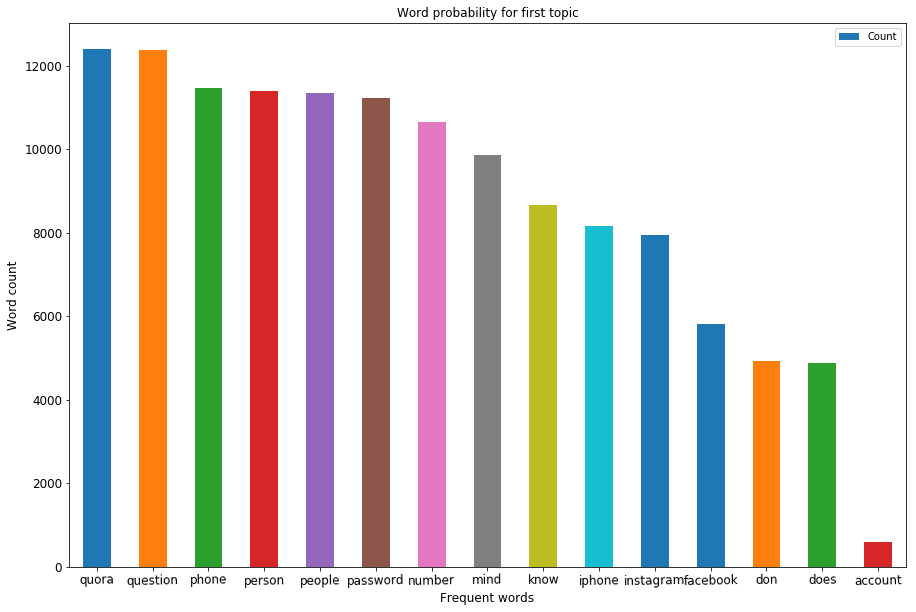

In [86]:
word_list = []
probability_list = []

for index in first_topic.argsort()[-15:]:
    frequent_word = count_vectorizer1.get_feature_names()[index]
    print(frequent_word, sep=" ")
    word_list.append(frequent_word)
    probability_list.append(index)
    
show_chart(word_list, probability_list, "Word probability for first topic")

In [87]:
word_list = []
probability_list = []

top_number = 20
count = 0
for probability_number in lda2.components_:
    text_message = f"Top words for topic {count} are : "
    print(text_message)    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer1.get_feature_names()[number]], end= "")
    print("\n")  
    count += 1

Top words for topic 0 are : 
['use']['human']['email']['exist']['whatsapp']['number']['mind']['password']['person']['question']['know']['phone']['iphone']['instagram']['does']['don']['facebook']['account']['quora']['people']

Top words for topic 1 are : 
['time']['fat']['youtube']['light']['war']['hair']['did']['friend']['earth']['way']['movie']['lose']['weight']['feel']['love']['best']['like']['mean']['world']['does']

Top words for topic 2 are : 
['online']['earn']['black']['important']['government']['language']['year']['rs']['going']['india']['indian']['know']['things']['1000']['500']['notes']['day']['new']['make']['money']

Top words for topic 3 are : 
['power']['difference']['card']['series']['guy']['control']['school']['game']['college']['know']['tv']['girls']['high']['long']['water']['2016']['examples']['girl']['does']['like']

Top words for topic 4 are : 
['management']['period']['relationship']['days']['data']['united']['states']['girlfriend']['online']['people']['make']['bad'

In [88]:
# return  the probability of each particular questions file belonging to a particular topic
textfile_topics = lda2.transform(doc_term_matrix1)

In [89]:
textfile_topics

array([[0.69999891, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333442],
       [0.025     , 0.02500002, 0.02500284, ..., 0.02500048, 0.02500233,
        0.025     ],
       [0.03333333, 0.03333333, 0.0333361 , ..., 0.03333691, 0.03333333,
        0.03334843],
       ...,
       [0.02      , 0.02000009, 0.54067461, ..., 0.02      , 0.02      ,
        0.02001095],
       [0.02500192, 0.02500656, 0.52484821, ..., 0.02500001, 0.27512723,
        0.02500861],
       [0.02000122, 0.02000147, 0.02000024, ..., 0.02000042, 0.02000064,
        0.02000035]])

In [98]:
topic_list = []  # declaring a empty array
# Textfile_topics is a list of arrays containing 
# all index positions of words for each textfile
for popular_index_pos in textfile_topics:
    # Get the max index position in each array
    # and add to the topic_list list
    topic_list.append(popular_index_pos.argmax())

# Add a new column to the dataframe
dataframe["Topic number"] = topic_list

In [99]:
dataframe

,question,Topic number
528339,How do I hack a wifi?,0
161450,Wwe is real fight?,6
699472,What is written in vedas?,6
736752,Why don't women propose to men in India?,5
772144,Which car should I buy for my parents in India?,8
329727,Would there be trans people if society had no ...,0
467123,What is a data scientist?,4
565569,I recently lost my phone. How can I get it back?,3
450954,How do I use anonymous.com?,9
682524,What are the best Bollywood movies of 2016 so ...,1


Now we can examine each topic and assign matching descrptions for each topic number. I'll create a list of topic number with relevant text and then match the topic number to the relevant topic text using the list.

In [101]:
topic_list = {0: "Technology", 
              1: "Life Style", 
              2: "Business", 
              3: "Activities", 
              4: "Relationships", 
              5: "Politics", 
              6: "Work & Careers", 
              7: "Education", 
              8: "Travel", 
              9: "Learning", 
              }

topic_no_to_topic = dataframe["Topic number"].map(topic_list)

In [102]:
# assigning these values back to the data frame.
dataframe["Topic desc"] = topic_no_to_topic
# return each document as well as the assigned topic number and each topic description.
dataframe

,question,Topic number,Topic desc
528339,How do I hack a wifi?,0,Technology
161450,Wwe is real fight?,6,Work & Careers
699472,What is written in vedas?,6,Work & Careers
736752,Why don't women propose to men in India?,5,Politics
772144,Which car should I buy for my parents in India?,8,Travel
329727,Would there be trans people if society had no ...,0,Technology
467123,What is a data scientist?,4,Relationships
565569,I recently lost my phone. How can I get it back?,3,Activities
450954,How do I use anonymous.com?,9,Learning
682524,What are the best Bollywood movies of 2016 so ...,1,Life Style


The final model is created using the following parameters:
 1. n_components = 10
 2. learning_decay = 0.5
 3. random_state=1
 4. max_df = 0.70 
 5. min_df = 4
    
Based on the Log Likelihood and Perplexity values model 1 and model 3 are almost have equal performance. Eventhough the performance of the first model is slightly better than the model - 3 which is tuned based on the gridsearch parameters. 

Still we can increase the performance of the model by chaging and playing with above mentioned parameters.

I choose LDA insted of NMF because of two reason.

1. In NMF the performance matrix or efficiency can not be evaluated in terms of Log Likelihood and Perplexity values. Hence which makes it difficult for comparision of models with in the NMF and comparision with LDA model.
2. LDA  adds a Dirichlet prior on top of the data generating process, meaning NMF qualitatively leads to worse mixtures. It fixes values for the probability vectors of the multinomials, whereas LDA allows the topics and words themselves to vary.

In [103]:
# importing the new dataframe into csv file
dataframe.to_csv(r'quora_supervised.csv', index = False, header = True)